# Convert Kinetics Library to Training Reactions Script

Specify the kinetics library name below and run the script.  It automatically overwrites the training reactions files it needs to.  Then you should commit those files.

This script only trains safely.  In other words, if a single match from an RMG family is found, a training reaction is created.  Sometimes, there are no matches from RMG reaction families, or multiple matches.  This indicates an error that requires manual fixing, and a printout is given in the script.

In [1]:
from rmgpy import settings
from rmgpy.data.rmg import RMGDatabase
from kinetics_library_to_training_tools_modified import *
import kinetics_library_to_training_tools_modified# import process_reactions
from base64 import b64encode
from IPython.display import display, HTML
import os
import re
from importlib import reload


# Set libraries to load reactions from; set to None to load all libraries
# libraries = ['PFAS_HPL']
libraries = ['PFAS_HPL_Test/PFAS_Hydrolysis']
# Set families to add training reactions to; either 'default' or a list, e.g. ['R_Addition_MultipleBond']
# families = ['Perfluoroalkene_Formation',
            # 'CF_Radical_Formation_3',
            # 'CF_Radical_Formation_2', 
            # 'CF_Radical_Formation_1', 
            # 'OF_Radical_Formation', 
            # 'Enol_Ether_Formation',
            # 'Lactone_to_Perfluoroalkene', 
            # 'CO2_Elimination_From_Lactone', 
            # 'CO2_Elimination_From_Carboxylic_Acid', 
            # 'CO2_Elimination_From_Lactone_Ether', 
            # 'CO_Elimination_From_Lactone', 
            # 'CO_CF_bond_dissociation', 
            # 'PFAS_Hydrolysis', 
            # 'Lactone_Formation', 
            # 'CO2_Elimination_From_PFCA_Radical']

# Specify whether to plot kinetics comparisons
compare_kinetics = False

# Specify whether to print library reactions which don't fit in the specified families
# This can result in a lot of unnecessary output if only using a few families
show_all = False

# Specify whether to prioritize aromatic resonance structures to reduce cases of multiple matches
filter_aromatic = True
#filter_aromatic = 

# Specify whether to use verbose comments when averaging tree
verbose_comments = True




# families = ['Perfluorinated_Alkyl_Rearrangement']

thermolibs = [
'C1_C2_Fluorine', #putting Siddha's as most trusted because Caroline used this thermo for calcs
'PFCA_thermo',
'NCSU_C2_C8_PFAS', #using this as second trusted thermo because has good estimates for higher C pfas
'Fluorine',
'primaryThermoLibrary',
'FFCM1(-)',
'halogens',
'CHOF_G4',
'CHOCl_G4',
'CHOBr_G4',
'CHOFCl_G4',
'CHOFBr_G4',
'CHOFClBr_G4',
'DFT_QCI_thermo',
'2-BTP_G4',
'thermo_DFT_CCSDTF12_BAC',
'SulfurHaynes'
]

# thermolibs = []

In [4]:
# families = ['default', 'halogens']
families = ['PFAS_Hydrolysis']

In [3]:
# #if we want to add in the other reaction families (not new) 
# matched_families_path = '/work/westgroup/nora/Code/projects/PFAS/AIChE_2024/organized_into_rxn_families/HPL_matches/'
# matched_htmls = [html for html in os.listdir(matched_families_path) if '_matched_rxns.html' in html]
# previously_matched_families = [re.search('(\S+)_matched_rxns', html).group(1) for html in matched_htmls]
# families.extend(previously_matched_families)

families = ['Perfluoroalkene_Formation',
 'CF_Radical_Formation_3',
 'CF_Radical_Formation_2',
 'CF_Radical_Formation_1',
 'OF_Radical_Formation',
 'Enol_Ether_Formation',
 'Lactone_to_Perfluoroalkene',
'CO2_Elimination_From_Lactone',
 'CO2_Elimination_From_Carboxylic_Acid',
'CO2_Elimination_From_Lactone_Ether',
'CO_Elimination_From_Lactone',
 'CO_CF_bond_dissociation',
 'PFAS_Hydrolysis',
 'Lactone_Formation',
'CO2_Elimination_From_PFCA_Radical',
 '1+2_Cycloaddition',
 '1,2_Insertion_CO',
 '1,2_Insertion_carbene',
 '1,3_Insertion_CO2',
 '1,3_sigmatropic_rearrangement',
 'F_Abstraction',
 'Intra_R_Add_Endocyclic',
 'R_Addition_COm',
 'R_Addition_MultipleBond',
 'R_Recombination',
 'Singlet_Carbene_Intra_Disproportionation',
 'XY_Addition_MultipleBond',
 'Enol_Ether_Formation',
 'Perfluorinated_Alkyl_Rearrangement']

#these ones are missed, maybe they're fitting to a new family? 
# ['CO2_Elimination_From_Lactone',
#  'CO2_Elimination_From_Lactone_Ether',
#  'CO_Elimination_From_Lactone',
#  'CO2_Elimination_From_PFCA_Radical']


## Step 1: Load RMG-database with specified libraries and families

In [5]:
database = RMGDatabase()
database.load(
    path = settings['database.directory'],
    thermo_libraries = thermolibs,  # Can add others if necessary
    kinetics_families = families,
    reaction_libraries = libraries,
    kinetics_depositories = ['training'],
)
# If we want accurate kinetics comparison, add existing training reactions and fill tree by averaging
if compare_kinetics:
    for family in database.kinetics.families.values():
        if not family.auto_generated:
            family.add_rules_from_training(thermo_database=database.thermo)
            family.fill_rules_by_averaging_up(verbose=verbose_comments)

testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing
testing


In [7]:
database.kinetics.families.keys()

dict_keys(['PFAS_Hydrolysis'])

## Step 2a: Generate library reactions from families to get proper labels

In [ ]:
reload(kinetics_library_to_training_tools_modified)

[Species(label="CF2O", molecule=[Molecule(smiles="O=C(F)F")], molecular_weight=(66.0069,'amu')), Species(label="H2O", molecule=[Molecule(smiles="O")], molecular_weight=(18.0153,'amu'))] [Species(label="FC(O)OH", molecule=[Molecule(smiles="O=C(O)F")], molecular_weight=(64.0158,'amu')), Species(label="HF", molecule=[Molecule(smiles="F")], molecular_weight=(20.0064,'amu'))]
getting fam rxn list now...
testing


This is the family reaction list before filtering aromatics: ['PFAS_Hydrolysis']
found a family
O=C(F)F + O <=> F + O=C(O)F PFAS_Hydrolysis
testing
testing
testing



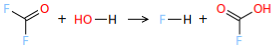
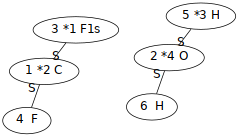

[Species(label="CF4", molecule=[Molecule(smiles="FC(F)(F)F")], molecular_weight=(88.0043,'amu')), Species(label="H2O", molecule=[Molecule(smiles="O")], molecular_weight=(18.0153,'amu'))] [Species(label="CF3OH", molecule=[Molecule(smiles="OC(F)(F)F")], molecular_weight=(86.0132,'amu')), Species(label="HF", molecule=[Molecule(smiles="F")], molecular_weight=(20.0064,'amu'))]
getting fam rxn list now...
testing
This is the family reaction list before filtering aromatics: ['PFAS_Hydrolysis']
found a family
FC(F)(F)F + O <=> F + OC(F)(F)F PFAS_Hydrolysis
testing
testing
testing



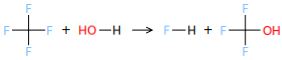
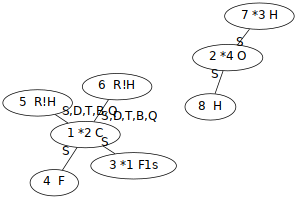

[Species(label="CF3CFO", molecule=[Molecule(smiles="O=C(F)C(F)(F)F")], molecular_weight=(116.014,'amu')), Species(label="H2O", molecule=[Molecule(smiles="O")], molecular_weight=(18.0153,'amu'))] [Species(label="CF3C(O)OH", molecule=[Molecule(smiles="O=C(O)C(F)(F)F")], molecular_weight=(114.023,'amu')), Species(label="HF", molecule=[Molecule(smiles="F")], molecular_weight=(20.0064,'amu'))]
getting fam rxn list now...
testing
This is the family reaction list before filtering aromatics: ['PFAS_Hydrolysis']
found a family
O=C(F)C(F)(F)F + O <=> F + O=C(O)C(F)(F)F PFAS_Hydrolysis
testing
testing
testing



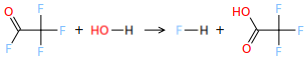
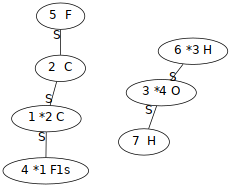

[Species(label="C2F6", molecule=[Molecule(smiles="FC(F)(F)C(F)(F)F")], molecular_weight=(138.012,'amu')), Species(label="H2O", molecule=[Molecule(smiles="O")], molecular_weight=(18.0153,'amu'))] [Species(label="C2F5OH", molecule=[Molecule(smiles="OC(F)(F)C(F)(F)F")], molecular_weight=(136.021,'amu')), Species(label="HF", molecule=[Molecule(smiles="F")], molecular_weight=(20.0064,'amu'))]
getting fam rxn list now...
testing
This is the family reaction list before filtering aromatics: ['PFAS_Hydrolysis']
found a family
FC(F)(F)C(F)(F)F + O <=> F + OC(F)(F)C(F)(F)F PFAS_Hydrolysis
testing
testing
testing



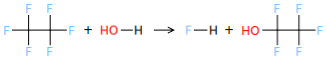
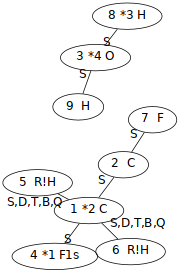

[Species(label="C2F5CFO", molecule=[Molecule(smiles="O=C(F)C(F)(F)C(F)(F)F")], molecular_weight=(166.022,'amu')), Species(label="H2O", molecule=[Molecule(smiles="O")], molecular_weight=(18.0153,'amu'))] [Species(label="C2F5C(O)OH", molecule=[Molecule(smiles="O=C(O)C(F)(F)C(F)(F)F")], molecular_weight=(164.031,'amu')), Species(label="HF", molecule=[Molecule(smiles="F")], molecular_weight=(20.0064,'amu'))]
getting fam rxn list now...
testing
This is the family reaction list before filtering aromatics: ['PFAS_Hydrolysis']
found a family
O=C(F)C(F)(F)C(F)(F)F + O <=> F + O=C(O)C(F)(F)C(F)(F)F PFAS_Hydrolysis
testing
testing
testing



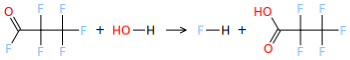
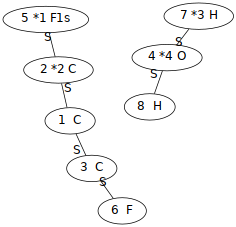

[Species(label="C3F8", molecule=[Molecule(smiles="FC(F)(F)C(F)(F)C(F)(F)F")], molecular_weight=(188.019,'amu')), Species(label="H2O", molecule=[Molecule(smiles="O")], molecular_weight=(18.0153,'amu'))] [Species(label="C3F7OH", molecule=[Molecule(smiles="OC(F)(F)C(F)(F)C(F)(F)F")], molecular_weight=(186.028,'amu')), Species(label="HF", molecule=[Molecule(smiles="F")], molecular_weight=(20.0064,'amu'))]
getting fam rxn list now...
testing
This is the family reaction list before filtering aromatics: ['PFAS_Hydrolysis']
found a family
FC(F)(F)C(F)(F)C(F)(F)F + O <=> F + OC(F)(F)C(F)(F)C(F)(F)F PFAS_Hydrolysis
testing
testing
testing



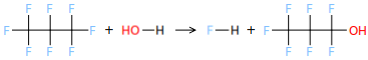
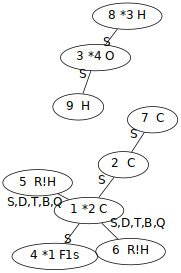

[Species(label="C3F7CFO", molecule=[Molecule(smiles="O=C(F)C(F)(F)C(F)(F)C(F)(F)F")], molecular_weight=(216.029,'amu')), Species(label="H2O", molecule=[Molecule(smiles="O")], molecular_weight=(18.0153,'amu'))] [Species(label="C3F7C(O)OH", molecule=[Molecule(smiles="O=C(O)C(F)(F)C(F)(F)C(F)(F)F")], molecular_weight=(214.038,'amu')), Species(label="HF", molecule=[Molecule(smiles="F")], molecular_weight=(20.0064,'amu'))]
getting fam rxn list now...
testing
This is the family reaction list before filtering aromatics: ['PFAS_Hydrolysis']
found a family
O=C(F)C(F)(F)C(F)(F)C(F)(F)F + O <=> F + O=C(O)C(F)(F)C(F)(F)C(F)(F)F PFAS_Hydrolysis
testing
testing
testing



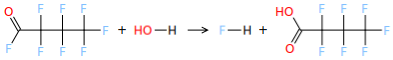
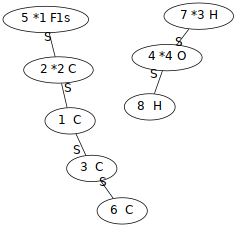

[Species(label="CFHO", molecule=[Molecule(smiles="O=CF")], molecular_weight=(48.0164,'amu')), Species(label="H2O", molecule=[Molecule(smiles="O")], molecular_weight=(18.0153,'amu'))] [Species(label="HC(O)OH", molecule=[Molecule(smiles="O=CO")], molecular_weight=(46.0254,'amu')), Species(label="HF", molecule=[Molecule(smiles="F")], molecular_weight=(20.0064,'amu'))]
getting fam rxn list now...
testing
This is the family reaction list before filtering aromatics: ['PFAS_Hydrolysis']
found a family
O=CF + O <=> F + O=CO PFAS_Hydrolysis
testing
testing



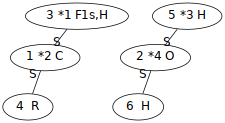

[Species(label="CH3CFO", molecule=[Molecule(smiles="CC(=O)F")], molecular_weight=(62.043,'amu')), Species(label="H2O", molecule=[Molecule(smiles="O")], molecular_weight=(18.0153,'amu'))] [Species(label="CH3C(O)OH", molecule=[Molecule(smiles="CC(=O)O")], molecular_weight=(60.052,'amu')), Species(label="HF", molecule=[Molecule(smiles="F")], molecular_weight=(20.0064,'amu'))]
getting fam rxn list now...
testing
This is the family reaction list before filtering aromatics: ['PFAS_Hydrolysis']
found a family
CC(=O)F + O <=> F + CC(=O)O PFAS_Hydrolysis
testing
testing



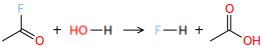
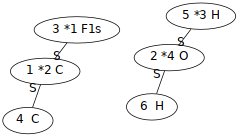

[Species(label="CH2O", molecule=[Molecule(smiles="C=O")], molecular_weight=(30.026,'amu')), Species(label="H2O", molecule=[Molecule(smiles="O")], molecular_weight=(18.0153,'amu'))] [Species(label="HC(O)OH", molecule=[Molecule(smiles="O=CO")], molecular_weight=(46.0254,'amu')), Species(label="H2", molecule=[Molecule(smiles="[H][H]")], molecular_weight=(2.01594,'amu'))]
getting fam rxn list now...
This is the family reaction list before filtering aromatics: ['PFAS_Hydrolysis']
found a family
C=O + O <=> [H][H] + O=CO PFAS_Hydrolysis



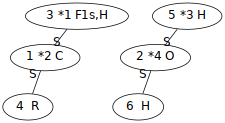

[Species(label="CH3CHO", molecule=[Molecule(smiles="CC=O")], molecular_weight=(44.0526,'amu')), Species(label="H2O", molecule=[Molecule(smiles="O")], molecular_weight=(18.0153,'amu'))] [Species(label="CH3C(O)OH", molecule=[Molecule(smiles="CC(=O)O")], molecular_weight=(60.052,'amu')), Species(label="H2", molecule=[Molecule(smiles="[H][H]")], molecular_weight=(2.01594,'amu'))]
getting fam rxn list now...
This is the family reaction list before filtering aromatics: ['PFAS_Hydrolysis']
found a family
CC=O + O <=> [H][H] + CC(=O)O PFAS_Hydrolysis



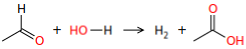
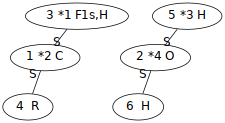

[Species(label="C2H5CHO", molecule=[Molecule(smiles="CCC=O")], molecular_weight=(58.0792,'amu')), Species(label="H2O", molecule=[Molecule(smiles="O")], molecular_weight=(18.0153,'amu'))] [Species(label="C2H5C(O)OH", molecule=[Molecule(smiles="CCC(=O)O")], molecular_weight=(74.0786,'amu')), Species(label="H2", molecule=[Molecule(smiles="[H][H]")], molecular_weight=(2.01594,'amu'))]
getting fam rxn list now...
This is the family reaction list before filtering aromatics: ['PFAS_Hydrolysis']
found a family
CCC=O + O <=> [H][H] + CCC(=O)O PFAS_Hydrolysis



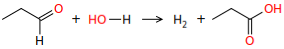
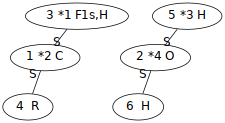

[Species(label="CH3F", molecule=[Molecule(smiles="CF")], molecular_weight=(34.033,'amu')), Species(label="H2O", molecule=[Molecule(smiles="O")], molecular_weight=(18.0153,'amu'))] [Species(label="CH3OH", molecule=[Molecule(smiles="CO")], molecular_weight=(32.0419,'amu')), Species(label="HF", molecule=[Molecule(smiles="F")], molecular_weight=(20.0064,'amu'))]
getting fam rxn list now...
testing
This is the family reaction list before filtering aromatics: ['PFAS_Hydrolysis']
found a family
CF + O <=> F + CO PFAS_Hydrolysis
testing
testing



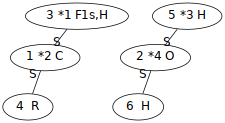

[Species(label="C2H5F", molecule=[Molecule(smiles="CCF")], molecular_weight=(48.0595,'amu')), Species(label="H2O", molecule=[Molecule(smiles="O")], molecular_weight=(18.0153,'amu'))] [Species(label="C2H5OH", molecule=[Molecule(smiles="CCO")], molecular_weight=(46.0685,'amu')), Species(label="HF", molecule=[Molecule(smiles="F")], molecular_weight=(20.0064,'amu'))]
getting fam rxn list now...
testing
This is the family reaction list before filtering aromatics: ['PFAS_Hydrolysis']
found a family
CCF + O <=> F + CCO PFAS_Hydrolysis
testing
testing



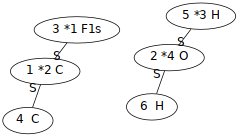

[Species(label="C3H7F", molecule=[Molecule(smiles="CCCF")], molecular_weight=(62.0861,'amu')), Species(label="H2O", molecule=[Molecule(smiles="O")], molecular_weight=(18.0153,'amu'))] [Species(label="C3H7OH", molecule=[Molecule(smiles="CCCO")], molecular_weight=(60.0951,'amu')), Species(label="HF", molecule=[Molecule(smiles="F")], molecular_weight=(20.0064,'amu'))]
getting fam rxn list now...
testing
This is the family reaction list before filtering aromatics: ['PFAS_Hydrolysis']
found a family
CCCF + O <=> F + CCCO PFAS_Hydrolysis
testing
testing



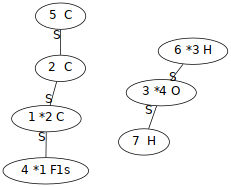

[Species(label="CH4", molecule=[Molecule(smiles="C")], molecular_weight=(16.0425,'amu')), Species(label="H2O", molecule=[Molecule(smiles="O")], molecular_weight=(18.0153,'amu'))] [Species(label="CH3OH", molecule=[Molecule(smiles="CO")], molecular_weight=(32.0419,'amu')), Species(label="H2", molecule=[Molecule(smiles="[H][H]")], molecular_weight=(2.01594,'amu'))]
getting fam rxn list now...
This is the family reaction list before filtering aromatics: ['PFAS_Hydrolysis']
found a family
C + O <=> [H][H] + CO PFAS_Hydrolysis



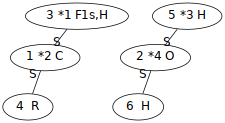

[Species(label="C2H6", molecule=[Molecule(smiles="CC")], molecular_weight=(30.0691,'amu')), Species(label="H2O", molecule=[Molecule(smiles="O")], molecular_weight=(18.0153,'amu'))] [Species(label="C2H5OH", molecule=[Molecule(smiles="CCO")], molecular_weight=(46.0685,'amu')), Species(label="H2", molecule=[Molecule(smiles="[H][H]")], molecular_weight=(2.01594,'amu'))]
getting fam rxn list now...
This is the family reaction list before filtering aromatics: ['PFAS_Hydrolysis']
found a family
CC + O <=> [H][H] + CCO PFAS_Hydrolysis



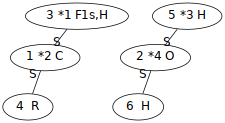

[Species(label="C3H8", molecule=[Molecule(smiles="CCC")], molecular_weight=(44.0957,'amu')), Species(label="H2O", molecule=[Molecule(smiles="O")], molecular_weight=(18.0153,'amu'))] [Species(label="C3H7OH", molecule=[Molecule(smiles="CCCO")], molecular_weight=(60.0951,'amu')), Species(label="H2", molecule=[Molecule(smiles="[H][H]")], molecular_weight=(2.01594,'amu'))]
getting fam rxn list now...
This is the family reaction list before filtering aromatics: ['PFAS_Hydrolysis']
found a family
CCC + O <=> [H][H] + CCCO PFAS_Hydrolysis



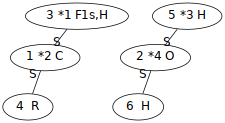

In [8]:
master_dict, multiple_dict, lib_fam_rxn_dict = kinetics_library_to_training_tools_modified.process_reactions(database,
                                               libraries,
                                               list(database.kinetics.families.keys()),
                                               compare_kinetics=compare_kinetics,
                                               show_all=show_all,
                                               filter_aromatic=filter_aromatic)

In [11]:
#let's get how many are matched: 
for family, matched_reactions in master_dict['PFAS_HPL_Test/PFAS_Hydrolysis'].items():
    print(family, len(matched_reactions))

PFAS_Hydrolysis 18


## Step 2b (optional): Review and select reactions to be added

In [ ]:
review_reactions(master_dict, prompt=False)

## Step 2c (optional): Manual processing for reactions with multiple matches

In [ ]:
manual_selection(master_dict, multiple_dict, database)

## Step 2d: Final review of reactions to be added

The following reactions will be added to the indicated families.
Source Library: PFAS_HPL_Test/PFAS_Hydrolysis
--------------------------------------------------------------------------------
Destination Family: PFAS_Hydrolysis

Original Library Reaction: 


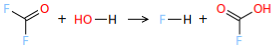

Arrhenius(A=(0.242,'cm^3/(mol*s)'), n=3.33, Ea=(35135.3,'cal/mol'), T0=(1,'K'))

Original Library Reaction: 


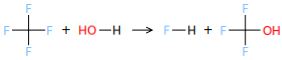

Arrhenius(A=(48.9,'cm^3/(mol*s)'), n=3.22, Ea=(86268,'cal/mol'), T0=(1,'K'))

Original Library Reaction: 


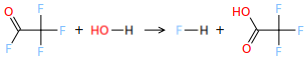

Arrhenius(A=(0.0257,'cm^3/(mol*s)'), n=3.6, Ea=(30432.1,'cal/mol'), T0=(1,'K'))

Original Library Reaction: 


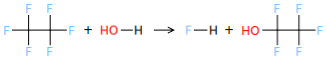

Arrhenius(A=(2.98,'cm^3/(mol*s)'), n=3.36, Ea=(80307.6,'cal/mol'), T0=(1,'K'))

Original Library Reaction: 


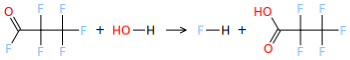

Arrhenius(A=(0.00923,'cm^3/(mol*s)'), n=3.71, Ea=(30829.4,'cal/mol'), T0=(1,'K'))

Original Library Reaction: 


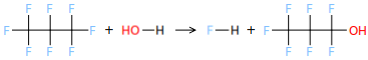

Arrhenius(A=(0.0677,'cm^3/(mol*s)'), n=3.77, Ea=(79908.1,'cal/mol'), T0=(1,'K'))

Original Library Reaction: 


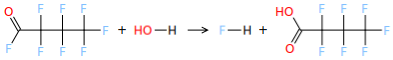

Arrhenius(A=(0.00267,'cm^3/(mol*s)'), n=3.86, Ea=(31139.6,'cal/mol'), T0=(1,'K'))

Original Library Reaction: 


Arrhenius(A=(0.861,'cm^3/(mol*s)'), n=3.26, Ea=(31335.5,'cal/mol'), T0=(1,'K'))

Original Library Reaction: 


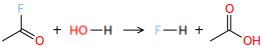

Arrhenius(A=(0.68,'cm^3/(mol*s)'), n=3.28, Ea=(30890.2,'cal/mol'), T0=(1,'K'))

Original Library Reaction: 


Arrhenius(A=(6.43e-07,'cm^3/(mol*s)'), n=5.03, Ea=(58456.6,'cal/mol'), T0=(1,'K'))

Original Library Reaction: 


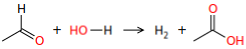

Arrhenius(A=(8.54e-07,'cm^3/(mol*s)'), n=4.97, Ea=(58650.2,'cal/mol'), T0=(1,'K'))

Original Library Reaction: 


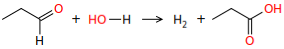

Arrhenius(A=(5.12e-07,'cm^3/(mol*s)'), n=5.03, Ea=(57674.4,'cal/mol'), T0=(1,'K'))

Original Library Reaction: 


Arrhenius(A=(10.3,'cm^3/(mol*s)'), n=3.42, Ea=(65515.4,'cal/mol'), T0=(1,'K'))

Original Library Reaction: 


Arrhenius(A=(5.99,'cm^3/(mol*s)'), n=3.24, Ea=(61755.8,'cal/mol'), T0=(1,'K'))

Original Library Reaction: 


Arrhenius(A=(1.46,'cm^3/(mol*s)'), n=3.33, Ea=(61435.6,'cal/mol'), T0=(1,'K'))

Original Library Reaction: 


Arrhenius(A=(0.000523,'cm^3/(mol*s)'), n=4.85, Ea=(112002,'cal/mol'), T0=(1,'K'))

Original Library Reaction: 


Arrhenius(A=(0.000297,'cm^3/(mol*s)'), n=4.79, Ea=(107719,'cal/mol'), T0=(1,'K'))

Original Library Reaction: 


Arrhenius(A=(1.46e-05,'cm^3/(mol*s)'), n=4.98, Ea=(107230,'cal/mol'), T0=(1,'K'))
All reactions reviewed.


In [12]:
review_reactions(master_dict, prompt=False)

## Step 3: Write the new training reactions to the database

In [13]:
for library_name, reaction_dict in master_dict.items():
    library = database.kinetics.libraries[library_name]
    
    for family_name, reaction_list in reaction_dict.items():
        print('Adding training reactions from {0} to {1}...'.format(library_name, family_name))

        family = database.kinetics.families[family_name]
        try:
            depository = family.get_training_depository()
        except:
            raise Exception('Unable to find training depository in {0}. Check that one exists.'.format(family_name))

        print('Training depository previously had {} rxns. Now adding {} new rxn(s).'.format(len(depository.entries), len(reaction_list)))

        ref_list = []
        type_list = []
        short_list = []
        long_list = []
        
        for reaction in reaction_list:
            # Get the original entry to retrieve metadata
            orig_entry = library.entries[reaction.index]
            short_desc = orig_entry.short_desc
            long_desc = 'Training reaction from kinetics library: {0}\nOriginal entry: {1}'.format(library_name, orig_entry.label)
            if orig_entry.long_desc:
                long_desc += '\n' + orig_entry.long_desc
            
            ref_list.append(orig_entry.reference)
            type_list.append(orig_entry.reference_type)
            short_list.append(short_desc)
            long_list.append(long_desc)
            
        family.save_training_reactions(
            reaction_list,
            reference=ref_list,
            reference_type=type_list,
            short_desc=short_list,
            long_desc=long_list,
        )

Adding training reactions from PFAS_HPL_Test/PFAS_Hydrolysis to PFAS_Hydrolysis...
Training depository previously had 7 rxns. Now adding 18 new rxn(s).


## Why did the cell above add the species to the dictionaries without their atom labels???
# Let's debug 

In [ ]:
#here are the reaction families that we modified. All have reactions that are added in as double. 
changed_families = ['Perfluoroalkene_Formation',
 'CF_Radical_Formation_3',
 'CF_Radical_Formation_2',
 'CF_Radical_Formation_1',
 'OF_Radical_Formation',
 'Enol_Ether_Formation',
 'Lactone_to_Perfluoroalkene',
 'CO2_Elimination_From_Lactone',
 'CO2_Elimination_From_Carboxylic_Acid',
 'CO2_Elimination_From_Lactone_Ether',
 'CO_Elimination_From_Lactone',
 'CO_CF_bond_dissociation',
 'PFAS_Hydrolysis',
 'Lactone_Formation',
 'CO2_Elimination_From_PFCA_Radical',
 '1+2_Cycloaddition',
 '1,2_Insertion_CO',
 #'1,2_Insertion_carbene',
 #'1,3_Insertion_CO2',
 '1,3_sigmatropic_rearrangement',
 #'F_Abstraction',
 # 'Intra_R_Add_Endocyclic',
 # 'R_Addition_COm',
 #'R_Addition_MultipleBond',
 'R_Recombination',
#  'Singlet_Carbene_Intra_Disproportionation',
 #'XY_Addition_MultipleBond',
 'Enol_Ether_Formation',
 'Perfluorinated_Alkyl_Rearrangement']

R Recombination

In [ ]:
#let's start with R recombination

#I have just changed everything in R_recombination folder to its state in 7d283e194a19530e498a56106cc5e73dec02e3f4

family_of_interest = 'R_Recombination'

for library_name, reaction_dict in master_dict.items():
    library = database.kinetics.libraries[library_name]
    
    for family_name, reaction_list in reaction_dict.items():
        if family_name==family_of_interest:

            print('Adding training reactions from {0} to {1}...'.format(library_name, family_name))

            family = database.kinetics.families[family_name]
            try:
                depository = family.get_training_depository()
            except:
                raise Exception('Unable to find training depository in {0}. Check that one exists.'.format(family_name))

            print('Training depository previously had {} rxns. Now adding {} new rxn(s).'.format(len(depository.entries), len(reaction_list)))

            ref_list = []
            type_list = []
            short_list = []
            long_list = []
            
            for reaction in reaction_list:
                # Get the original entry to retrieve metadata
                orig_entry = library.entries[reaction.index]
                short_desc = orig_entry.short_desc
                long_desc = 'Training reaction from kinetics library: {0}\nOriginal entry: {1}'.format(library_name, orig_entry.label)
                if orig_entry.long_desc:
                    long_desc += '\n' + orig_entry.long_desc
                
                ref_list.append(orig_entry.reference)
                type_list.append(orig_entry.reference_type)
                short_list.append(short_desc)
                long_list.append(long_desc)
                
            family.save_training_reactions(
                reaction_list,
                reference=ref_list,
                reference_type=type_list,
                short_desc=short_list,
                long_desc=long_list,
                 )
        else: 
            continue

In [ ]:
#modified for R_recombination
#my version of family.save_training_rxns
# I changed the RMG-Py code to include this and then reran the cell above (which worked)

from rmgpy.data.base import Database
import os

dictionary_path = '/Users/khalil.nor/Code/RMG-database/input/kinetics/families/R_Recombination/training/dictionary.txt'
species_dict = Database().get_species(dictionary_path)


training_path = os.path.join(settings['database.directory'], 'kinetics', 'families',
                                     "R_Recombination", 'training')

dictionary_path = os.path.join(training_path, 'dictionary.txt')

species_dict = Database().get_species(dictionary_path)

R_recomb_rxn_list = master_dict['PFAS_HPL']['R_Recombination']

for rxn in R_recomb_rxn_list:
    for new_spec in (rxn.reactants+rxn.products):
        for ex_spec in species_dict.values(): 
            if ex_spec.molecule[0].get_formula() != new_spec.molecule[0].get_formula():
                continue 
            else: #if they do have the same formula
                spec_labeled_atoms = new_spec.molecule[0].get_all_labeled_atoms()
                spcs_labels = sorted(spec_labeled_atoms.keys())
                ex_spec_labeled_atoms = ex_spec.molecule[0].get_all_labeled_atoms()
                ex_spcs_labels = sorted(ex_spec_labeled_atoms.keys())
                if spcs_labels != ex_spcs_labels:
                    # the species have different labels, therefore not a match
                    continue
                initial_map = {}
                try: 
                    for atomLabel in spec_labeled_atoms:
                        print(ex_spec.molecule[0].get_formula(),new_spec.molecule[0].get_formula(), atomLabel, spec_labeled_atoms, ex_spec_labeled_atoms)
                        if isinstance(spec_labeled_atoms[atomLabel],list): #if the error with the R recomb stuff comes up
                            list_of_labeled_atoms_spec = spec_labeled_atoms[atomLabel]
                            sorted_spec_labeled_atoms = sorted(list_of_labeled_atoms_spec)
                            list_of_labeled_atoms_ex_spec = ex_spec_labeled_atoms[atomLabel]
                            sorted_ex_spec_labeled_atoms = sorted(list_of_labeled_atoms_ex_spec)
                            if sorted_ex_spec_labeled_atoms==sorted_spec_labeled_atoms: #if the sorted species are the same
                                #it's likely a match
                                #just do isomorphic check with a modified initial map:
                                initial_map[sorted_ex_spec_labeled_atoms[0]]= sorted_spec_labeled_atoms[0]
                                initial_map[sorted_ex_spec_labeled_atoms[1]]= sorted_spec_labeled_atoms[1]
                                # if new_spec.molecule[0].is_isomorphic(ex_spec.molecule[0], initial_map):
                                #     new_spec.label = ex_spec.label
                                #     print('already in here')
                        else: #if it doesn't just proceed as normal
                            initial_map[spec_labeled_atoms[atomLabel]] = ex_spec_labeled_atoms[atomLabel]
                except KeyError:
                    # Atom labels did not match, therefore not a match
                    print('ppf')
                    continue
                if new_spec.molecule[0].is_isomorphic(ex_spec.molecule[0], initial_map):
                    new_spec.label = ex_spec.label
                    break
        else:  # No isomorphic existing species found
            spec_formula = new_spec.molecule[0].get_formula()
            if spec_formula not in species_dict:
                new_spec.label = spec_formula
                print(f'added {new_spec.label}')
            else: #modify the name
                index = 2
                while (spec_formula + '-{}'.format(index)) in species_dict:
                    index += 1
                new_spec.label = spec_formula + '-{}'.format(index)
                print(f'added {new_spec.label} as -2')
            #spec_to_be_added_in[spec.label] = spec
            species_dict[new_spec.label] = new_spec


In [ ]:
#let's check out the previous files before any of training reactions for new families were added in (1f8469e37380275855ea61228f0576944485668a)

# previous families: 

#1,2_Insertion_Carbene  
#F_Abstraction
#'R_Addition_MultipleBond'
#'XY_Addition_MultipleBond'
# '1,3_Insertion_CO2'
# 'Singlet_Carbene_Intra_Disproportionation',
# Intra_R_Add_Endocyclic
# R_Addition_COm
# 1,2_Insertion_CO
# 1+2_Cycloaddition
# '1,3_sigmatropic_rearrangement

#all reset to when they were retrained but before new families added. Commited on Aug 27th. 





After this reset, some of the previous families need to be retrained becuase the count of the matched training reactions changed after modifications to the RMG-database and RMG-Py 
* R recombination - on short 
* XY_Addition_Multiplebond 
* Singlet_carbene_intra_disp
* 1+2_Cycloaddition
* 1,3_sigmatropic_rearrangement

In [ ]:
#XY_MultipleBond

#first, resetting so it is back to before it was retrained at all. Had 44 reactions in reactions.py

family_of_interest = 'XY_Addition_MultipleBond' #now we will be adding 10 reactions to this (previously 11 were added)

for library_name, reaction_dict in master_dict.items():
    library = database.kinetics.libraries[library_name]
    
    for family_name, reaction_list in reaction_dict.items():
        if family_name==family_of_interest:

            print('Adding training reactions from {0} to {1}...'.format(library_name, family_name))

            family = database.kinetics.families[family_name]
            try:
                depository = family.get_training_depository()
            except:
                raise Exception('Unable to find training depository in {0}. Check that one exists.'.format(family_name))

            print('Training depository previously had {} rxns. Now adding {} new rxn(s).'.format(len(depository.entries), len(reaction_list)))

            ref_list = []
            type_list = []
            short_list = []
            long_list = []
            
            for reaction in reaction_list:
                # Get the original entry to retrieve metadata
                orig_entry = library.entries[reaction.index]
                short_desc = orig_entry.short_desc
                long_desc = 'Training reaction from kinetics library: {0}\nOriginal entry: {1}'.format(library_name, orig_entry.label)
                if orig_entry.long_desc:
                    long_desc += '\n' + orig_entry.long_desc
                
                ref_list.append(orig_entry.reference)
                type_list.append(orig_entry.reference_type)
                short_list.append(short_desc)
                long_list.append(long_desc)
                
            family.save_training_reactions(
                reaction_list,
                reference=ref_list,
                reference_type=type_list,
                short_desc=short_list,
                long_desc=long_list,
                 )
        else: 
            continue

#completed Aug 27th 12:33, now 10 PFAS rxns added instead of 11. WIll now retrain. 

#Retrained and pushed to github on Aug 27th 


In [ ]:
# 1,3_Insertion_CO2

#first, resetting so it is back to before it was retrained at all. Did this manually. Had 4 reactions in it before any PFAS chemistry added. 

family_of_interest = '1,3_Insertion_CO2' #now we will be adding 10 reactions to this (previously 11 were added)

for library_name, reaction_dict in master_dict.items():
    library = database.kinetics.libraries[library_name]
    
    for family_name, reaction_list in reaction_dict.items():
        if family_name==family_of_interest:

            print('Adding training reactions from {0} to {1}...'.format(library_name, family_name))

            family = database.kinetics.families[family_name]
            try:
                depository = family.get_training_depository()
            except:
                raise Exception('Unable to find training depository in {0}. Check that one exists.'.format(family_name))

            print('Training depository previously had {} rxns. Now adding {} new rxn(s).'.format(len(depository.entries), len(reaction_list)))

            ref_list = []
            type_list = []
            short_list = []
            long_list = []
            
            for reaction in reaction_list:
                # Get the original entry to retrieve metadata
                orig_entry = library.entries[reaction.index]
                short_desc = orig_entry.short_desc
                long_desc = 'Training reaction from kinetics library: {0}\nOriginal entry: {1}'.format(library_name, orig_entry.label)
                if orig_entry.long_desc:
                    long_desc += '\n' + orig_entry.long_desc
                
                ref_list.append(orig_entry.reference)
                type_list.append(orig_entry.reference_type)
                short_list.append(short_desc)
                long_list.append(long_desc)
                
            family.save_training_reactions(
                reaction_list,
                reference=ref_list,
                reference_type=type_list,
                short_desc=short_list,
                long_desc=long_list,
                 )
        else: 
            continue

#completed Aug 27th 1:18, now 11 PFAS rxns added instead of 9. WIll now retrain. 
#retraining completed Aug 27th. Pushed to github